In [1]:
import pandas as pd
import numpy as np

In [2]:
audit = pd.read_csv('audit_risk.csv')

In [3]:
print(audit.isnull().sum())

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64


# Fill NA Values

In [4]:
audit['Money_Value']=audit['Money_Value'].fillna(audit['Money_Value'].median())

In [5]:
trial = pd.read_csv('trial.csv')

In [6]:
trial['Money_Value']=trial['Money_Value'].fillna(trial['Money_Value'].median())

In [7]:
print(trial.isnull().sum())

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64


In [8]:
audit.columns = map(str.lower, audit.columns)

In [9]:
trial.columns = map(str.lower, trial.columns)

In [10]:
audit.dtypes

sector_score      float64
location_id        object
para_a            float64
score_a           float64
risk_a            float64
para_b            float64
score_b           float64
risk_b            float64
total             float64
numbers           float64
score_b.1         float64
risk_c            float64
money_value       float64
score_mv          float64
risk_d            float64
district_loss       int64
prob              float64
risk_e            float64
history             int64
prob              float64
risk_f            float64
score             float64
inherent_risk     float64
control_risk      float64
detection_risk    float64
audit_risk        float64
risk                int64
dtype: object

In [11]:
trial.dtypes #scorea and scoreb(make float),

sector_score     float64
location_id       object
para_a           float64
score_a            int64
para_b           float64
score_b            int64
total            float64
numbers          float64
marks              int64
money_value      float64
money_marks        int64
district           int64
loss               int64
loss_score         int64
history            int64
history_score      int64
score            float64
risk               int64
dtype: object

In [12]:
trial['score_a']=trial['score_a'].astype(float)

In [13]:
trial['score_b']=trial['score_b'].astype(float)

# Remove outliers in audit

In [14]:
audit.shape

(776, 27)

In [15]:
from scipy import stats
z=np.abs(stats.zscore(audit.iloc[:,np.r_[0,2:27]]))
print(z) #Warning occurs because some of the columns have standard deviation 0

[[0.67046481 0.30480033 1.42984618 ...        nan 0.14112307 1.24268351]
 [0.67046481 0.43173627 0.86976136 ...        nan 0.17228042 0.80471013]
 [0.67046481 0.34187176 0.86976136 ...        nan 0.17748711 0.80471013]
 ...
 [1.45599165 0.38944709 0.86976136 ...        nan 0.17796327 0.80471013]
 [1.45599165 0.39649529 0.86976136 ...        nan 0.17804608 0.80471013]
 [1.45599165 0.43173627 0.86976136 ...        nan 0.17792186 0.80471013]]


C:\Users\parth\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [16]:
outlier =list((np.where(z > 3)))

C:\Users\parth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [17]:
rows=set(outlier[0])

In [18]:
delrows =list(rows)

In [19]:
audit_dt=audit.drop(delrows)

In [20]:
#Removing 100% skewed data as they are totally useless and does not help in modeling
for i in range(0,len(audit_dt.columns)):
    print(audit_dt.columns.values[i],' is---->   {:,.2f}'.format(audit_dt.iloc[:,i].value_counts(normalize=True).values[0]*100), '% skewed ')

sector_score  is---->   27.65 % skewed 
location_id  is---->   9.78 % skewed 
para_a  is---->   20.25 % skewed 
score_a  is---->   56.01 % skewed 
risk_a  is---->   20.25 % skewed 
para_b  is---->   37.43 % skewed 
score_b  is---->   70.53 % skewed 
risk_b  is---->   37.43 % skewed 
total  is---->   12.29 % skewed 
numbers  is---->   94.55 % skewed 
score_b.1  is---->   94.55 % skewed 
risk_c  is---->   94.55 % skewed 
money_value  is---->   45.53 % skewed 
score_mv  is---->   78.21 % skewed 
risk_d  is---->   45.67 % skewed 
district_loss  is---->   85.47 % skewed 
prob  is---->   100.00 % skewed 
risk_e  is---->   85.47 % skewed 
history  is---->   95.95 % skewed 
prob  is---->   95.95 % skewed 
risk_f  is---->   95.95 % skewed 
score  is---->   40.50 % skewed 
inherent_risk  is---->   7.26 % skewed 
control_risk  is---->   81.98 % skewed 
detection_risk  is---->   100.00 % skewed 
audit_risk  is---->   7.26 % skewed 
risk  is---->   65.50 % skewed 


In [21]:
audit_dt.drop(['prob'], axis=1, inplace = True)

In [22]:
audit_dt.shape

(716, 25)

# Remove Outliers in Trial

In [23]:
trial.shape

(776, 18)

In [24]:
from scipy import stats
z=np.abs(stats.zscore(trial.iloc[:,np.r_[0,2:18]]))
print(z) 

[[0.67046481 0.30480033 1.42984618 ... 0.24656792 0.35250258 0.77246865]
 [0.67046481 0.43173627 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [0.67046481 0.34187176 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 ...
 [1.45599165 0.38944709 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [1.45599165 0.39649529 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [1.45599165 0.43173627 0.86976136 ... 0.24656792 0.81850259 1.29455091]]


In [25]:
outlier =list((np.where(z > 3)))

In [26]:
rows=set(outlier[0])

In [27]:
delrows =list(rows)

In [28]:
trial_dt=trial.drop(delrows)

In [29]:
for i in range(0,len(trial_dt.columns)):
    print(trial_dt.columns.values[i],' is---->   {:,.2f}'.format(trial_dt.iloc[:,i].value_counts(normalize=True).values[0]*100), '% skewed ')

sector_score  is---->   27.65 % skewed 
location_id  is---->   9.78 % skewed 
para_a  is---->   20.25 % skewed 
score_a  is---->   56.01 % skewed 
para_b  is---->   37.43 % skewed 
score_b  is---->   70.53 % skewed 
total  is---->   12.29 % skewed 
numbers  is---->   94.55 % skewed 
marks  is---->   94.55 % skewed 
money_value  is---->   45.53 % skewed 
money_marks  is---->   78.21 % skewed 
district  is---->   85.47 % skewed 
loss  is---->   100.00 % skewed 
loss_score  is---->   100.00 % skewed 
history  is---->   95.95 % skewed 
history_score  is---->   95.95 % skewed 
score  is---->   40.50 % skewed 
risk  is---->   59.50 % skewed 


In [30]:
trial_dt.drop(['loss'], axis=1, inplace = True)
trial_dt.drop(['loss_score'], axis=1, inplace = True)

In [31]:
trial_dt.shape

(716, 16)

# Merge two datasets into one

In [32]:
data=audit_dt.merge(trial_dt, left_on='location_id', right_on='location_id')

In [33]:
print(data.isnull().sum())

sector_score_x    0
location_id       0
para_a_x          0
score_a_x         0
risk_a            0
para_b_x          0
score_b_x         0
risk_b            0
total_x           0
numbers_x         0
score_b.1         0
risk_c            0
money_value_x     0
score_mv          0
risk_d            0
district_loss     0
risk_e            0
history_x         0
risk_f            0
score_x           0
inherent_risk     0
control_risk      0
detection_risk    0
audit_risk        0
risk_x            0
sector_score_y    0
para_a_y          0
score_a_y         0
para_b_y          0
score_b_y         0
total_y           0
numbers_y         0
marks             0
money_value_y     0
money_marks       0
district          0
history_y         0
history_score     0
score_y           0
risk_y            0
dtype: int64


In [34]:
data.shape

(26398, 40)

In [35]:
data.columns.values

array(['sector_score_x', 'location_id', 'para_a_x', 'score_a_x', 'risk_a',
       'para_b_x', 'score_b_x', 'risk_b', 'total_x', 'numbers_x',
       'score_b.1', 'risk_c', 'money_value_x', 'score_mv', 'risk_d',
       'district_loss', 'risk_e', 'history_x', 'risk_f', 'score_x',
       'inherent_risk', 'control_risk', 'detection_risk', 'audit_risk',
       'risk_x', 'sector_score_y', 'para_a_y', 'score_a_y', 'para_b_y',
       'score_b_y', 'total_y', 'numbers_y', 'marks', 'money_value_y',
       'money_marks', 'district', 'history_y', 'history_score', 'score_y',
       'risk_y'], dtype=object)

In [36]:
data = pd.concat([data, pd.get_dummies(data['location_id'], prefix='locationid')], axis=1)
data.drop(['location_id'], axis=1, inplace = True)



In [37]:
import csv
with open('data.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)
    
csvfile.close()

data.to_csv('data.csv')

In [38]:
y = data['audit_risk']

In [39]:
data.drop(['audit_risk'],axis=1, inplace=True)

In [40]:
X = data

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [42]:
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X,y,random_state=0,)

In [43]:
X.head()

,sector_score_x,para_a_x,score_a_x,risk_a,para_b_x,score_b_x,risk_b,total_x,numbers_x,score_b.1,...,locationid_43,locationid_44,locationid_5,locationid_6,locationid_7,locationid_8,locationid_9,locationid_LOHARU,locationid_NUH,locationid_SAFIDON
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0,0,0,0,0,0,0,0,0,0
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0,0,0,1,0,0,0,0,0,0
2,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0,0,0,1,0,0,0,0,0,0
3,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0,0,0,1,0,0,0,0,0,0


In [44]:


Scaler= MinMaxScaler()
X_train = Scaler.fit_transform(X_train_dt)
X_test = Scaler.transform(X_test_dt)

# Regression

In [45]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.9014509532897013
-4187231256266277.5


# Ridge

In [46]:
from sklearn.linear_model import Ridge
x_range = [0.001,0.01,0.1,1,10,100]
train_score_list=[]
test_score_list=[]

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [47]:
print(train_score_list)
print(test_score_list)


[0.9013748582892194, 0.8990358068654711, 0.8923318046623128, 0.889877151946026, 0.8884981209907548, 0.8760286198314923]
[0.8983241834490859, 0.8970075286890021, 0.8932039196318845, 0.8919352791604274, 0.8917828031305273, 0.8827335501674475]


Text(0.5,0,'$\\alpha$')

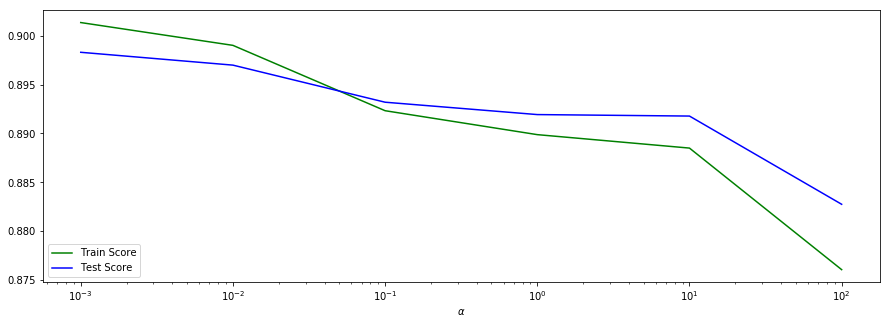

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [49]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.9014
Test score: 0.8983


In [50]:
ridge.coef_

array([ 4.42745642e-01,  6.89038275e+01,  5.77298470e-01,  1.61748020e+01,
        5.37122102e+02, -1.86143450e-01,  7.06408803e+00, -5.28197016e+02,
        4.36896380e-01,  4.36896380e-01,  4.36896380e-01,  3.52352828e+01,
        6.93304819e-01, -4.37379089e+00,  2.00273352e+00,  2.00273352e+00,
        3.18688599e+00,  3.18688599e+00,  6.77892133e-01,  1.26151417e+00,
        2.39745100e+00,  0.00000000e+00, -2.50732499e+00,  2.62874451e-02,
        1.25143431e+00,  8.63669673e-02,  8.03528443e+00, -2.54669735e-02,
       -8.18361765e+00,  3.31677481e-02,  3.31677481e-02,  1.25069001e-01,
       -2.97364532e-02,  3.11011059e-02, -2.18609521e-03, -2.18609520e-03,
        6.20077182e-03, -1.05328504e-02,  3.09139744e+00, -6.92327882e-03,
        9.98914087e-01,  3.72748088e-01,  2.78404776e-01,  3.41441703e-02,
        7.01399660e-01,  0.00000000e+00,  4.13377475e-01, -2.64786040e-02,
        5.17733109e-01, -6.36261939e-01, -1.09451807e+00, -7.95645990e-01,
        2.38933342e+00, -

In [51]:
max(ridge.coef_)

537.122102483477

In [52]:
ridge.intercept_

-0.48913282218841125

In [53]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 0.1, 50).reshape(-1,1)
x_range2 = np.linspace(0.1, 10, 100).reshape(-1,1)

In [54]:
x_range = np.append(x_range1, x_range2)
coeff = []



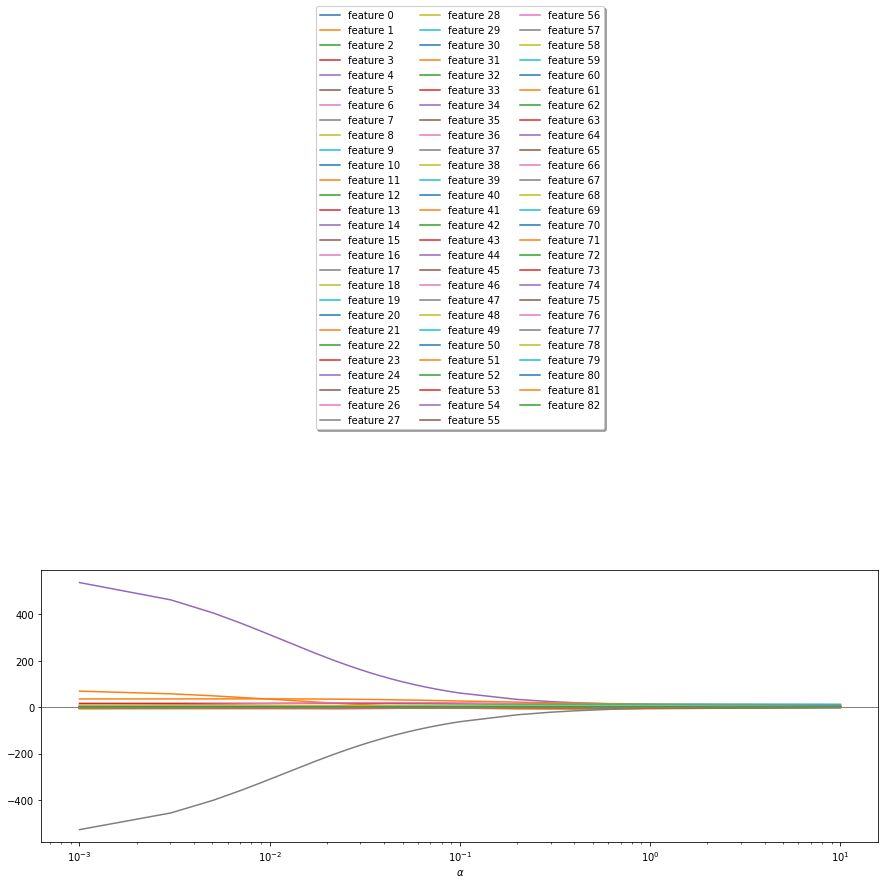

In [55]:
fig ,ax= plt.subplots(figsize = (15,5))
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,83):
    plt.plot(x_range, coeff[:,i],label = 'feature {:d}'.format(i))
    
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Lasso

In [56]:
from sklearn.linear_model import Lasso
x_range = [0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

C:\Users\parth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [57]:
print(train_score_list)
print(test_score_list)

[0.8916602154725672, 0.8916391601157064, 0.8913362194264514, 0.8887388348755072, 0.8862873604795126, 0.8358897921397188, 0.20504123885708903]
[0.8929932868032298, 0.8929866833034926, 0.892904239990982, 0.8916417071828721, 0.8905925687266196, 0.8449186387067884, 0.21517074650634238]


Text(0.5,0,'$\\alpha$')

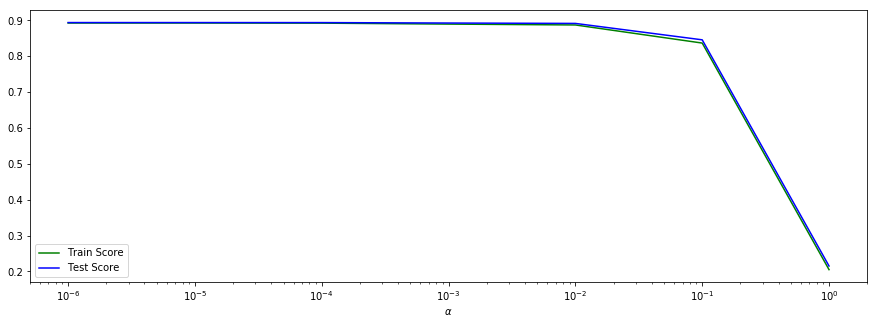

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

C:\Users\parth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


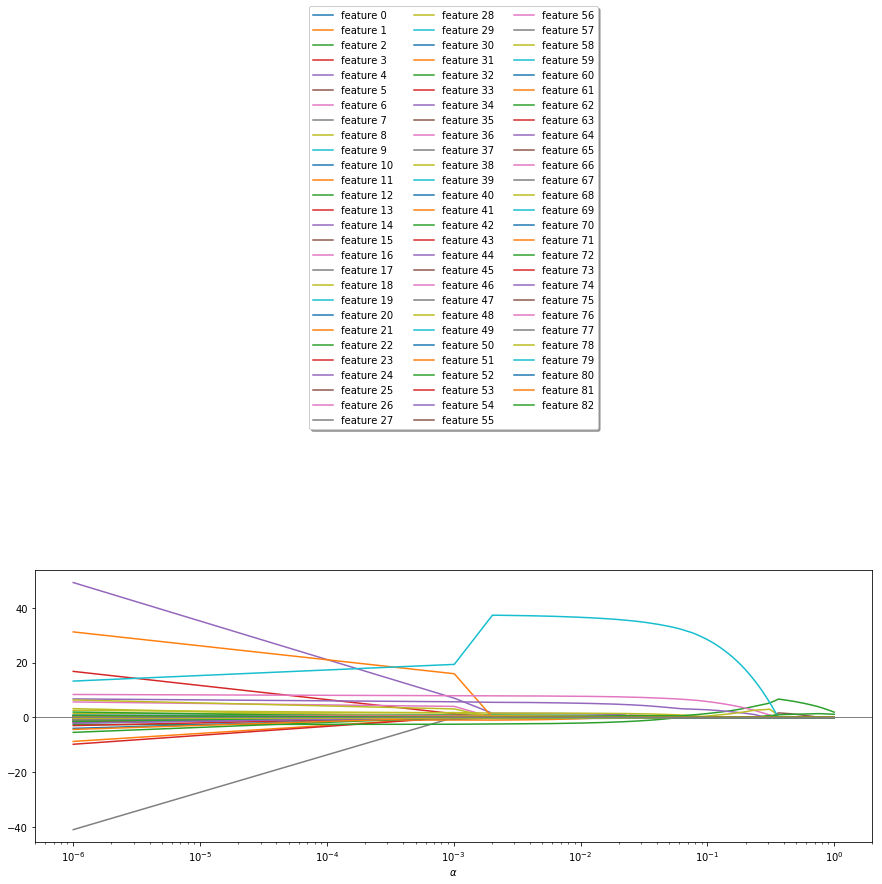

In [59]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.000001, 0.1, 100).reshape(-1,1)
x_range2 = np.linspace(0.1, 1, 100).reshape(-1,1)
x_range = np.append(x_range1, x_range2)
coeff = []

fig ,ax= plt.subplots(figsize = (15,5))
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,83):
    plt.plot(x_range, coeff[:,i],label = 'feature {:d}'.format(i))
    
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Text(0,0.5,'Audit_Risk')

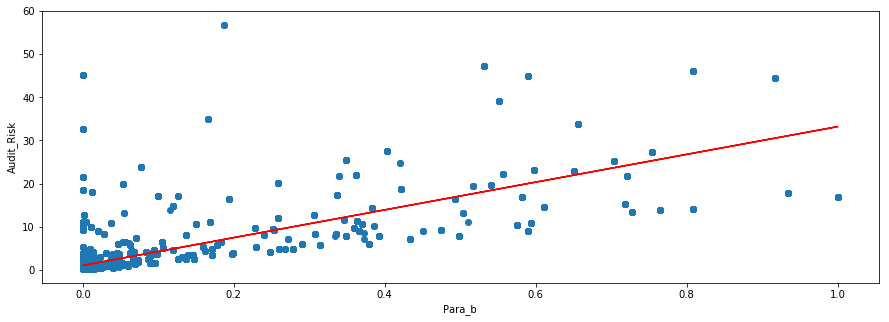

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

lasso = Lasso(0.000001)
X_train_Parab = X_train[:,4].reshape(-1,1)
lasso.fit(X_train_Parab,y_train)
y_predict = lasso.predict(X_train_Parab)
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(X_train_Parab, y_predict, c = 'r')
plt.scatter(X_train_Parab,y_train)
plt.xlabel('Para_b')
plt.ylabel('Audit_Risk')

Text(0,0.5,'Audit_Risk')

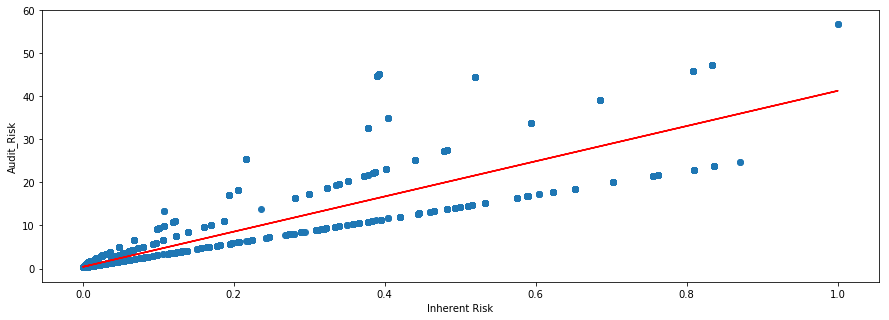

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

lasso = Lasso(0.001)
X_train_inherent = X_train[:,19].reshape(-1,1)
lasso.fit(X_train_inherent,y_train)
y_predict = lasso.predict(X_train_inherent)
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(X_train_inherent, y_predict, c = 'r')
plt.scatter(X_train_inherent,y_train)
plt.xlabel('Inherent Risk')
plt.ylabel('Audit_Risk')

# SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(random_state=0, max_iter=10000, learning_rate='optimal', penalty='l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))